In [1]:
using AutomotiveDrivingModels

using Interact

In [2]:
csvfiles = filter!(s->endswith(s, ".csv"), readdir("."))

2-element Array{Union(UTF8String,ASCIIString),1}:
 "risk_estimation_results_follow_equal.csv"
 "risk_estimation_results_three_car.csv"   

In [3]:
target_file_index = 1

1

In [4]:
df = readtable(csvfiles[target_file_index])

,p_nsimulations,p_speed_delta_count,p_speed_delta_jump,e_time_per_tick,e_ncollisions,e_performance,total_eval_time
1,1,0,0.0,0.1765589068917667,0,-0.1765589068917667,30.433550119400024
2,1,1,2.235,0.22946018611683566,0,-0.22946018611683566,39.014983892440796
3,1,1,4.47,0.2215137243270874,0,-0.2215137243270874,37.66561412811279
4,10,0,0.0,0.16080239800845875,0,-0.16080239800845875,27.34582495689392
5,10,1,2.235,0.28251164941226736,0,-0.28251164941226736,48.03636121749878
6,10,1,4.47,0.27890254749971277,0,-0.27890254749971277,47.422545194625854
7,100,0,0.0,0.32670586950638714,0,-0.32670586950638714,55.54968881607056
8,100,1,2.235,0.7024156780803905,0,-0.7024156780803905,119.42088508605957
9,100,1,4.47,0.6758237361907959,0,-0.6758237361907959,114.90056681632996


In [41]:
using PGFPlots
using Colors
colormap_rdbu = colormap("RdBu")

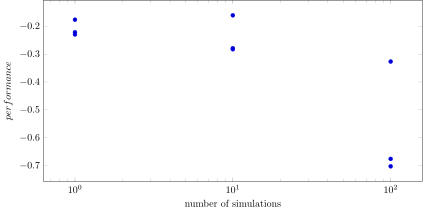

In [29]:
performance_arr = convert(Vector{Float64}, df[:e_performance])

p = Plots.Scatter(convert(Vector{Int}, df[:p_nsimulations]), performance_arr)
Axis(p, xlabel="number of simulations", ylabel=L"performance", width="15cm", height="8cm", xmode="log")

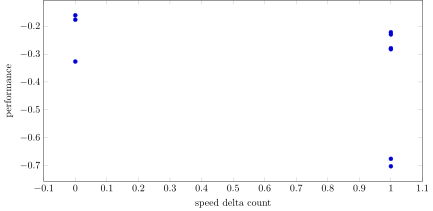

In [30]:
p = Plots.Scatter(convert(Vector{Int}, df[:p_speed_delta_count]), performance_arr)
Axis(p, xlabel="speed delta count", ylabel="performance", width="15cm", height="8cm")

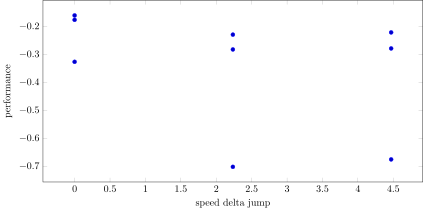

In [31]:
p = Plots.Scatter(convert(Vector{Float64}, df[:p_speed_delta_jump]), performance_arr)
Axis(p, xlabel="speed delta jump", ylabel="performance", width="15cm", height="8cm")

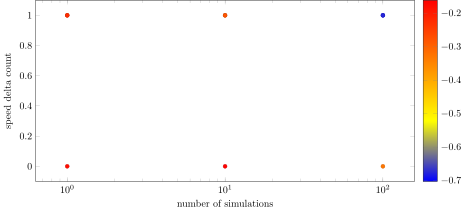

In [32]:
p = Plots.Scatter(convert(Vector{Int}, df[:p_nsimulations]), convert(Vector{Int}, df[:p_speed_delta_count]), performance_arr)
Axis(p, xlabel="number of simulations", ylabel="speed delta count", width="15cm", height="8cm", xmode="log", colorbar=true)

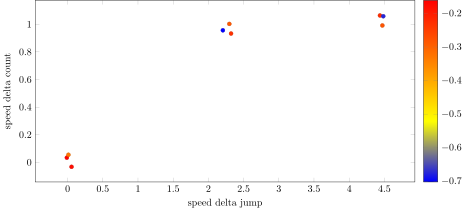

In [44]:
arr_x = convert(Vector{Float64}, df[:p_speed_delta_jump])
arr_x += randn(length(arr_x))*0.05

arr_y = convert(Vector{Int}, df[:p_speed_delta_count])
arr_y += randn(length(arr_y))*0.05

p = Plots.Scatter(arr_x, arr_y, performance_arr)
Axis(p, xlabel="speed delta jump", ylabel="speed delta count", width="15cm", height="8cm", colorbar=true)

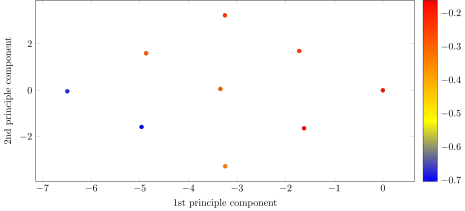

In [77]:
P = convert(Matrix{Float64}, df[:,1:3])
P[:,1] = log(P[:,1])
E = convert(Vector{Float64}, df[:e_performance])
M = hcat(P,E)

U, S, V = svd(P)

S_reduced = S[1:2]
U_reduced = U[:,1:2]
P_reduced = U_reduced*diagm(S_reduced)

arr_x = P_reduced[:,1]
arr_y = P_reduced[:,2]

p = Plots.Scatter(arr_x, arr_y, performance_arr)
Axis(p, xlabel="1st principle component", ylabel="2nd principle component", width="15cm", height="8cm", colorbar=true)